In [58]:
import pandas as pd

# Read the data

In [59]:
df = pd.read_csv('train.csv', index_col=False)

In [60]:
df.head()

,Unnamed: 0,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,145516,363572,1,3,1.0,3,1.0,0.0,0,1,...,3,2,4,8,1,1,0,0,1,0
1,316652,791377,1,4,1.0,6,1.0,6.0,0,1,...,3,2,5,9,0,1,1,1,1,0
2,329344,822990,1,0,1.0,9,1.0,0.0,0,0,...,8,1,2,9,0,1,1,0,0,0
3,254888,637055,1,0,1.0,4,1.0,0.0,0,0,...,4,1,3,11,1,0,1,0,0,0
4,333137,832325,1,1,2.0,1,1.0,0.0,0,0,...,4,3,1,12,0,0,0,0,0,0


In [61]:
df.shape

(20000, 56)

In [96]:
df.target.value_counts()  ## training set is balanced

1    10000
0    10000
Name: target, dtype: int64

In [62]:
df_test = pd.read_csv('test.csv', index_col=False)

In [63]:
df_test.head()

,Unnamed: 0,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,1,9,0,1,1.0,7,0.0,0.0,0,0,...,3,1,1,9,0,1,1,0,1,0
1,2,13,0,5,4.0,9,1.0,0.0,0,0,...,4,2,7,7,0,1,1,0,1,0
2,3,16,0,0,1.0,2,0.0,0.0,1,0,...,2,2,4,9,0,0,0,0,0,0
3,4,17,0,0,2.0,0,1.0,0.0,1,0,...,3,1,1,3,0,0,0,1,1,0
4,5,19,0,5,1.0,4,0.0,0.0,0,0,...,4,2,0,9,0,1,0,1,1,1


In [64]:
df_test.shape

(575212, 56)

In [97]:
df_test.target.value_counts()   ## this is highly imbalanced testing dataset, which has more 0 than 1

0    563518
1     11694
Name: target, dtype: int64

## Convert the catrgorical data to numerical 

In [65]:
col_cat = df.columns[[v[-3:] in 'cat' for v in df.columns]]

In [66]:
col_cat

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [67]:
## change the categorical data to numerical for training set
df_dummies = pd.get_dummies(df, columns=col_cat)
df_dummies = df_dummies.drop(['Unnamed: 0', 'id', 'target'], axis=1)
## change the categorical data to numerical for testing set
df_dummies_test = pd.get_dummies(df_test, columns=col_cat)
df_dummies_test = df_dummies_test.drop(['Unnamed: 0', 'id', 'target'], axis=1)

In [70]:
X_train = df_dummies.values
y_train = df.target.values

In [71]:
X_train.shape,y_train.shape

((20000, 212), (20000,))

In [72]:
X_test = df_dummies_test.values
y_test = df_test.target.values  
## y_test is just used for testing metrics, normally we do not have this in the real dataset

In [73]:
X_test.shape, y_test.shape

((575212, 212), (575212,))

# Decision Tree

### Method 1: decision tree without any constraints

In [16]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

##### Plot decision tree

In [46]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=df_dummies.columns,  
                         class_names='target',  
                         filled=True, rounded=True,  
                         special_characters=True)  


In [ ]:
graph = graphviz.Source(dot_data)  
graph ## the tree is plotted in the following block

### Method 2: decision tree with conditions

##### Q1.	Train a Decision Tree model using the train.csv. Please answer the following questions: (Use minimum split size = 20 and maximum depth = 15)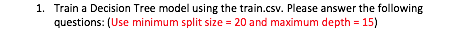

##### Answer: 

We use the DecisionTreeClassifier here and entropy as the splitting metric.

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
## train the model with decision tree classifier model
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 49, min_samples_split=20,
                               max_depth=15, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=49,
            splitter='best')

In [78]:
## test the data with previsouly trained decision tree model
y_pred_entropy = clf_entropy.predict(X_test)

##### Qi.	Provide confusion matrix for predictions on both train.csv and test.csv.

##### Answer: 
Training dataset: TP = 6497, FP = 2025, FN = 3503, TN = 7975

Testing dataset: TP = 5416, FP = 218385, FN = 6278, TN = 345133

In [102]:
## confusion matrix for training set
y_pred_entropy_train = clf_entropy.predict(X_train)

from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(y_train, y_pred_entropy_train,labels=[1, 0])
confusion_matrix_train

array([[6497, 3503],
       [2025, 7975]])

In [89]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred_entropy_train).ravel()
tn, fp, fn, tp

(7975, 2025, 3503, 6497)

In [101]:
## confusion matrix for testing set
y_pred_entropy_test = clf_entropy.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix_test = confusion_matrix(y_test, y_pred_entropy_test,labels=[1, 0])
confusion_matrix_test

array([[  5416,   6278],
       [218385, 345133]])

In [98]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_entropy_test).ravel()
tn, fp, fn, tp

(345133, 218385, 6278, 5416)

##### Qii.	Calculate precision, recall and f-score on claim class based on confusion matrix for train data.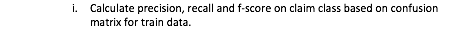

##### Answer:
precision: class 0: 0.695, class 1: 0.762

recall: class 0: 0.7975, class 1: 0.6497

f-score: class 0: 0.743, class 1: 0.702

In [82]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_train, y_pred_entropy_train)

In [83]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.69480746 0.76237972]
recall: [0.7975 0.6497]
fscore: [0.74262036 0.70154411]
support: [10000 10000]


In [108]:
## we can make a function via confusion matrix to calculate precision, recall and f-score
def myscores(smat): 
    tp = smat[0][0] 
    fn = smat[0][1] 
    fp = smat[1][0] 
    tn = smat[1][1] 
    return tp/(tp+fp), tp/(tp+fn), 2*tp/(2*tp+fp+fn) ## precision, recall, f1-score

In [109]:
myscores(confusion_matrix_train)  ## precision, recall, f1-score
## check the result to see if it is the same with the function "precision_recall_fscore_support"

(0.7623797230697019, 0.6497, 0.701544109707375)

##### Qiii.	Calculate precision, recall and f-score on claim class based on confusion matrix for test data.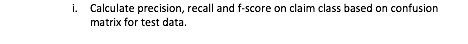

##### Answer:
precision: class 0: 0.982, class 1: 0.024

recall: class 0: 0.613, class 1: 0.463

f-score: class 0: 0.754, class 1: 0.046

In [110]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_entropy_test)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.98213488 0.02420007]
recall: [0.61246136 0.46314349]
fscore: [0.75444761 0.04599673]
support: [563518  11694]


In [112]:
## use "myscores" function to calculate the metrics by equations
myscores(confusion_matrix_test)  ## precision, recall, f1-score
## check the result to see if it is the same with the function "precision_recall_fscore_support"

(0.02420007059843343, 0.46314349238925945, 0.04599673029151362)

##### Qiv.	Compare the results of ii and iii. How do precision & recall change between training data and test data? Why do the changes happen?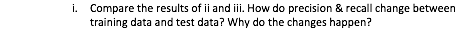

##### Answer: 

Compared training data with testing data, we can see that the overall precision decreases and overall recall increase much. But for class 1, the precision and recall both decreases.

The reason is testing set is highly imbalanced, there are much more 0 than 1. We can see that the correct predictions of 0 increase the overall performance of precision metric. It is the same for recall which is TN increases the whole precison.

Therefore, we could use f1-score since it ignore the influence of TN (true negative). Or we can also use AUC to prevent the problem of imbalanced data.

##### Qv.	Calculate True Positive Rate (TPR) and False Positive Rate (FPR) based on confusion matrix for train data.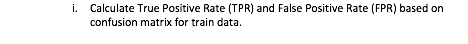

##### Answer:
TPR: 0.6497 (class 1)

FPR: 0.2025 (class 1)

In [116]:
## we can make a function via confusion matrix to calculate precision, recall and f-score
def myscores2(smat): 
    tp = smat[0][0] 
    fn = smat[0][1] 
    fp = smat[1][0] 
    tn = smat[1][1] 
    return tp/(tp+fn), fp/(fp+tn) ## TPR (recall), FPR

In [117]:
myscores2(confusion_matrix_train)  ## TPR (recall), FPR

(0.6497, 0.2025)

##### Qvi.	Calculate True Positive Rate (TPR) and False Positive Rate (FPR) based on confusion matrix for test data.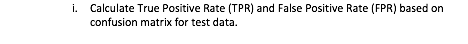

##### Answer:
TPR: 0.463 (class 1)

FPR: 0.388 (class 1)

In [118]:
myscores2(confusion_matrix_test)  ### TPR (recall), FPR

(0.46314349238925945, 0.38753864117916376)

##### Qvii.	Compare the results of v and vi.  How do TRP & FPR change between training data and test data? Why do the changes happen?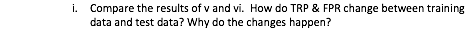

##### Answer:

Compared training data with testing data and class label = 1, TPR decreases and FPR increases. 

It is the same reason as previous questiosn --- highly imbalanced data for training set. Since TPR is actually the same as recall, TPR decrease with the small number of TP in the dataset. Therefore, FPR increase while # of TN increases. 

##### Qviii.	You would have observed different behavior of measures (precision&recall v.s. TPR&FPR) based on your answers in iv and vii. Which measures among precision&recall and TPR&FPR would you suggest to evaluate a classification model? (Hint: the number of samples in each class may vary dramatically in our population).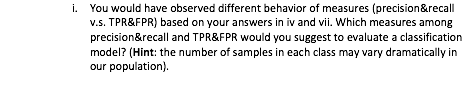

##### Answer:

Actually I think both of them are not good for evaluating the imbalanced dataset. The reason is 

1. TPR == Recall
2. They both depend on the number of TN, so the overall precison will increase if the prediction of 0 is correct (even though the prediction of 1 is not high). In this case, we may incorrectly get the thought that the predictions for class 1 and class 0 are good but actually class 1 is not.
3. If I can combine TPR&FPR together to generate AUC, then AUC will also be a good metric for classification problem.
4. Precision is more focused in the positive class than in the negative class, it actually measures the probability of correct detection of positive values, while FPR and TPR (ROC metrics) measure the ability to distinguish between the classes.

# Random Forest

##### Q2.	Train a Random Forest model using the train data. Please answer the following questions: (Use number of tree/estimators = 500)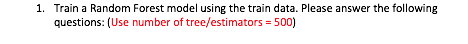

##### Answer:
We use the 'RandomForestClassifier' to classify the classes.

In [121]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(max_depth=10, n_estimators=500, min_samples_leaf=20, \
                                   max_features = 'auto', n_jobs = -1, random_state = 42)

model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [122]:
## predict the model result on test data
model_rfc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

##### Qi.	Provide confusion matrix for predictions on both train.csv and test.csv.

##### Answer: 
Training dataset: TP = 6366, FP = 3388, FN = 3634, TN = 6612

Testing dataset: TP = 6783, FP = 228091, FN = 4911, TN = 335427

In [123]:
## confusion matrix for training set
y_pred_rfc_train = model_rfc.predict(X_train)

from sklearn.metrics import confusion_matrix
confusion_matrix_rfc_train = confusion_matrix(y_train, y_pred_rfc_train,labels=[1, 0])
confusion_matrix_rfc_train

array([[6366, 3634],
       [3388, 6612]])

In [124]:
## confusion matrix for testing set
y_pred_rfc_test = model_rfc.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix_rfc_test = confusion_matrix(y_test, y_pred_rfc_test,labels=[1, 0])
confusion_matrix_rfc_test

array([[  6783,   4911],
       [228091, 335427]])

##### Qii.	Calculate precision, recall and f-score on claim class based on confusion matrix for train data.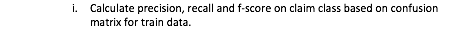

##### Answer:
precision: class 0: 0.645, class 1: 0.653

recall: class 0: 0.661, class 1: 0.637

f-score: class 0: 0.653, class 1: 0.644

In [125]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_train, y_pred_rfc_train)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.645325   0.65265532]
recall: [0.6612 0.6366]
fscore: [0.65316606 0.64452769]
support: [10000 10000]


In [127]:
## we can make a function via confusion matrix to calculate precision, recall and f-score
def myscores(smat): 
    tp = smat[0][0] 
    fn = smat[0][1] 
    fp = smat[1][0] 
    tn = smat[1][1] 
    return tp/(tp+fp), tp/(tp+fn), 2*tp/(2*tp+fp+fn) ## precision, recall, f1-score

In [128]:
myscores(confusion_matrix_rfc_train)  ## precision, recall, f1-score


(0.6526553208939923, 0.6366, 0.64452769059431)

##### Qiii.	Calculate precision, recall and f-score on claim class based on confusion matrix for test data.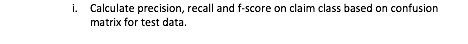

##### Answer:
precision: class 0: 0.986, class 1: 0.029

recall: class 0: 0.595, class 1: 0.580

f-score: class 0: 0.742, class 1: 0.055

In [129]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred_rfc_test)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.98557023 0.02887931]
recall: [0.59523742 0.58004105]
fscore: [0.74221336 0.05501931]
support: [563518  11694]


In [130]:
myscores(confusion_matrix_rfc_test)  ## precision, recall, f1-score


(0.028879314015174094, 0.5800410466906105, 0.05501930501930502)

##### Qiv.	Compare the results of ii and iii. How do precision & recall change between training data and test data? Why do the changes happen?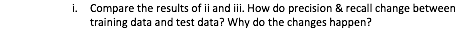

##### Answer:

The overall precision increase and overall recall decreses in testing dataset. However, for class 1, both the precision and recall are decreased.

This happens because the imbalanced dataset between class 0 and class 1.

##### Qv.	Calculate True Positive Rate (TPR) and False Positive Rate (FPR) based on confusion matrix for train data.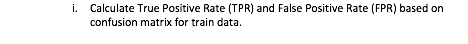

##### Answer:
TPR: 0.6366 (class 1)

FPR: 0.3388 (class 1)

In [131]:
## we can make a function via confusion matrix to calculate precision, recall and f-score
def myscores2(smat): 
    tp = smat[0][0] 
    fn = smat[0][1] 
    fp = smat[1][0] 
    tn = smat[1][1] 
    return tp/(tp+fn), fp/(fp+tn) ## TPR (recall), FPR

In [132]:
myscores2(confusion_matrix_rfc_train)  ## TPR (recall), FPR

(0.6366, 0.3388)

##### Qvi.	Calculate True Positive Rate (TPR) and False Positive Rate (FPR) based on confusion matrix for test data.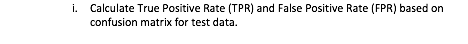

##### Answer:
TPR: 0.580 (class 1)

FPR: 0.405 (class 1)

In [133]:
myscores2(confusion_matrix_rfc_test)  ### TPR (recall), FPR

(0.5800410466906105, 0.40476258078712657)

##### Qvii.	Compare the results of v and vi.  How do TRP & FPR change between training data and test data? Why do the changes happen?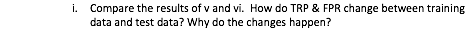

##### Answer:

For Class 1, TPR decreases and FPR increases, the reason is class labels are imbalanced. Specifically, the the number of class 0 is much more than class 1, hence the TN increases, and consequently TP seems much less than TN. 

The main difference between --- precision&recall V.S. TPR&FPR --- is that precision denominator contains the False positives while false positive rate denominator contains the true negatives.
While precision measures the probability of a sample classified as positive to actually be positive, the false positive rate measures the ratio of false positives within the negative samples.

Precision is more focused in the positive class than in the negative class, it actually measures the probability of correct detection of positive values, while FPR and TPR (ROC metrics) measure the ability to distinguish between the classes.